## BMI Category Classification using Machine Learning  
**Author:** Bhavya Malhotra  
**Date:** 25 December 2025  

## Abstract
This project analyzes Body Mass Index (BMI) patterns using a real-world dataset containing age, height, and weight measurements.
Exploratory Data Analysis(EDA) is conducted to understand relationships.
BMI is calculated using standard formulas and categorized into Underweight,
Normal, Overweight, and Obese classes.
A baseline Logistic Regression model is applied to demonstrate an interpretable machine learning workflow for BMI category classification.

In [43]:
#Import Libraries

import pandas as pd                      #for data handling
import numpy as np                       #for numerical operations
import matplotlib.pyplot as plt          #for plotting
import seaborn as sns                    #for advanced visualizations

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
#Load dataset

df=pd.read_csv(bmi.csv")
df.head()

,Age,Height,Weight
0,61,1.85,109.30
1,60,1.71,79.02
2,60,1.55,74.70
3,60,1.46,35.90
4,60,1.58,97.10


In [45]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     741 non-null    int64  
 1   Height  741 non-null    float64
 2   Weight  741 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 17.5 KB


In [46]:
#Statistical Summary
df.describe()

,Age,Height,Weight
count,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497
std,11.655466,0.085974,32.254547
min,15.000000,1.460000,25.900000
25%,22.000000,1.670000,63.000000
50%,29.000000,1.721000,72.900000
75%,40.000000,1.751000,83.300000
max,61.000000,2.070000,270.000000


In [47]:
#Missing Values Check
df.isnull().sum()

Age       0
Height    0
Weight    0
dtype: int64

In [48]:
#Calculate BMI
df["BMI"]=df["Weight"]/(df["Height"]**2)
df.head()

,Age,Height,Weight,BMI
0,61,1.85,109.30,31.935720
1,60,1.71,79.02,27.023700
2,60,1.55,74.70,31.092612
3,60,1.46,35.90,16.841809
4,60,1.58,97.10,38.896010


In [49]:
#Create BMI Category

def bmi_category(bmi):
    if(bmi<18.5):
        return "Underweight"
    elif(bmi<25):
        return "Normal"
    elif(bmi<30):
        return "Overweight"
    else:
        return "Obese"
df["BMI_category"]=df["BMI"].apply(bmi_category)
df.head()
        

,Age,Height,Weight,BMI,BMI_category
0,61,1.85,109.30,31.935720,Obese
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese


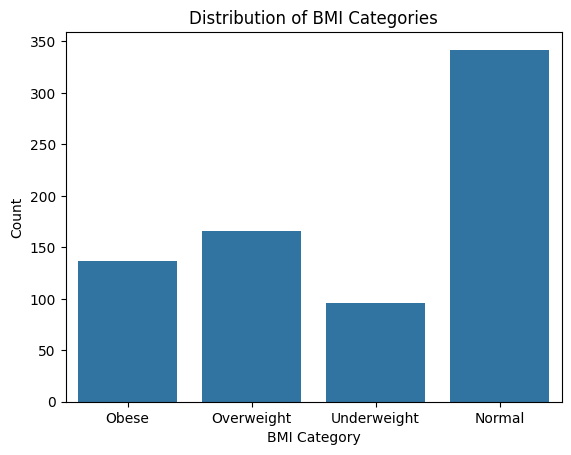

In [50]:
#Distribution of BMI Categories

sns.countplot(x="BMI_category",data=df)
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

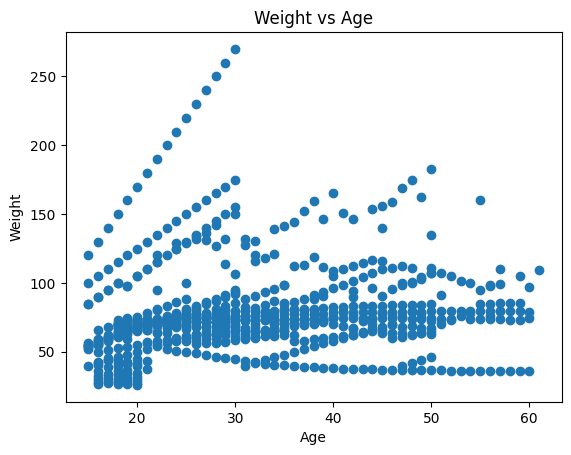

In [51]:
#Weight vs Age

plt.scatter(df["Age"],df["Weight"])
plt.title("Weight vs Age")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

In [52]:
#Features and Target

X=df[["Age","Height","Weight"]]
Y=df["BMI_category"]
X,Y

(     Age  Height  Weight
 0     61    1.85  109.30
 1     60    1.71   79.02
 2     60    1.55   74.70
 3     60    1.46   35.90
 4     60    1.58   97.10
 ..   ...     ...     ...
 736   34    1.86   95.70
 737   44    1.91  106.90
 738   25    1.82   88.40
 739   35    1.88   98.50
 740   45    1.93  109.90
 
 [741 rows x 3 columns],
 0            Obese
 1       Overweight
 2            Obese
 3      Underweight
 4            Obese
           ...     
 736     Overweight
 737     Overweight
 738     Overweight
 739     Overweight
 740     Overweight
 Name: BMI_category, Length: 741, dtype: object)

In [53]:
#Train test split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((592, 3), (149, 3))

In [54]:
#Logistic Regression Model

model=LogisticRegression(max_iter=1500)
model.fit(X_train,Y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [55]:
#Model Evaluation

Y_pred=model.predict(X_test)
print("Predicted BMI Category:",Y_pred)
print("Actual BMI Category:",Y_test.values)
print("Accuracy:",accuracy_score(Y_test,Y_pred))

Predicted BMI Category: ['Overweight' 'Overweight' 'Obese' 'Underweight' 'Normal' 'Obese'
 'Overweight' 'Obese' 'Obese' 'Normal' 'Normal' 'Normal' 'Obese'
 'Underweight' 'Normal' 'Normal' 'Overweight' 'Overweight' 'Overweight'
 'Overweight' 'Normal' 'Obese' 'Obese' 'Normal' 'Normal' 'Normal'
 'Overweight' 'Normal' 'Normal' 'Normal' 'Underweight' 'Overweight'
 'Normal' 'Obese' 'Obese' 'Overweight' 'Underweight' 'Overweight'
 'Underweight' 'Underweight' 'Normal' 'Normal' 'Overweight' 'Normal'
 'Obese' 'Normal' 'Underweight' 'Overweight' 'Normal' 'Overweight'
 'Overweight' 'Obese' 'Underweight' 'Obese' 'Normal' 'Overweight'
 'Overweight' 'Normal' 'Normal' 'Obese' 'Underweight' 'Obese' 'Normal'
 'Obese' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Underweight'
 'Normal' 'Normal' 'Overweight' 'Overweight' 'Normal' 'Overweight'
 'Overweight' 'Normal' 'Overweight' 'Overweight' 'Underweight' 'Normal'
 'Normal' 'Overweight' 'Normal' 'Overweight' 'Overweight' 'Normal'
 'Overweight' 'Normal' 'No

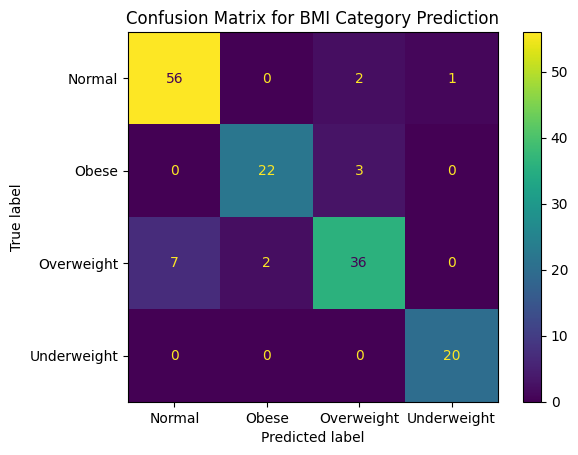

In [56]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred)
plt.title("Confusion Matrix for BMI Category Prediction")
plt.show()

## Evaluation

The BMI dataset shows most individuals fall within the normal or overweight categories, with fewer underweight or obese cases.
Age appears to have a moderate correlation with BMI; older individuals tend to have slightly higher BMI.
Height and weight data are consistent and have no missing values, making analysis reliable.
This simple BMI analysis provides a clear overview but does not capture other health factors like diet, activity, or genetics.

## Limitations
This project uses a small dataset with only age, height, and weight. More features and a larger dataset would improve the model’s predictive power. The model’s accuracy is limited and should not be used for medical decisions.

## Conclusion  
In this project, we investigated a health-related dataset and used Python to analyse the obesity indicator.
Exploratory Data Analysis(EDA) was performed using pandas and visuals.  
A machine learning model (Logistic Regression) was trained using age,height and weight to predict BMI category.  
Due to the limited size of the dataset, model accuracy is not the primary focus.  
However, the project demonstrates a complete machine learning workflow.  
With a larger real-world dataset,this approach could be extended to build a reliable health risk prediction system.